# Cvičení 2 - Diskrétní náhodná veličina
## Martina Litschmannová, Adéla Vrtková, Michal Béreš

# Příklady
## Příklad 1.
Majitel servisního střediska nabídl prodejně automobilů, která si zřídila autopůjčovnu své
služby. Za každý automobil zapůjčený jeho prostřednictvím obdrží od autopůjčovny 500,- Kč.
Zároveň se však zavázal, že každý den investuje do údržby zapůjčených automobilů 800,- Kč.
Počet automobilů zapůjčených prostřednictvím servisního střediska za 1 den je popsán následující pravděpodobnostní funkcí:
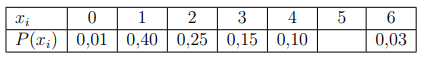
### 1. a)
Hodnota pravděpodobnostní funkce pro 5 automobilů byla špatně čitelná. Určete ji:

In [1]:
x <- c(0, 1, 2, 3, 4, 5, 6)
p <- c(0.01, 0.40, 0.25, 0.15, 0.10, 0, 0.03)
1 - sum(p) # počítačová aritmetika zde může zlobit
round(1 - sum(p), digits = 2) # zaokrouhlíme na setiny
p[6] <- round(1 - sum(p), digits = 2) # zápis pro x=5 je 6-tá pozice
p


[1] 0.06

[1] 0.06

[1] 0.01 0.40 0.25 0.15 0.10 0.06 0.03

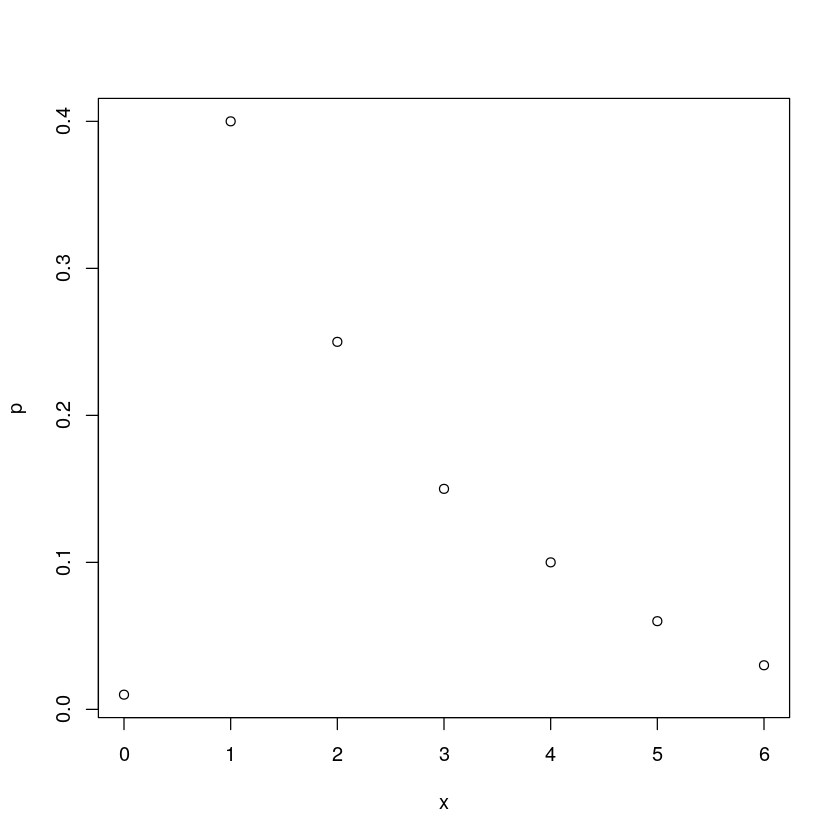

In [2]:
plot(x, p)


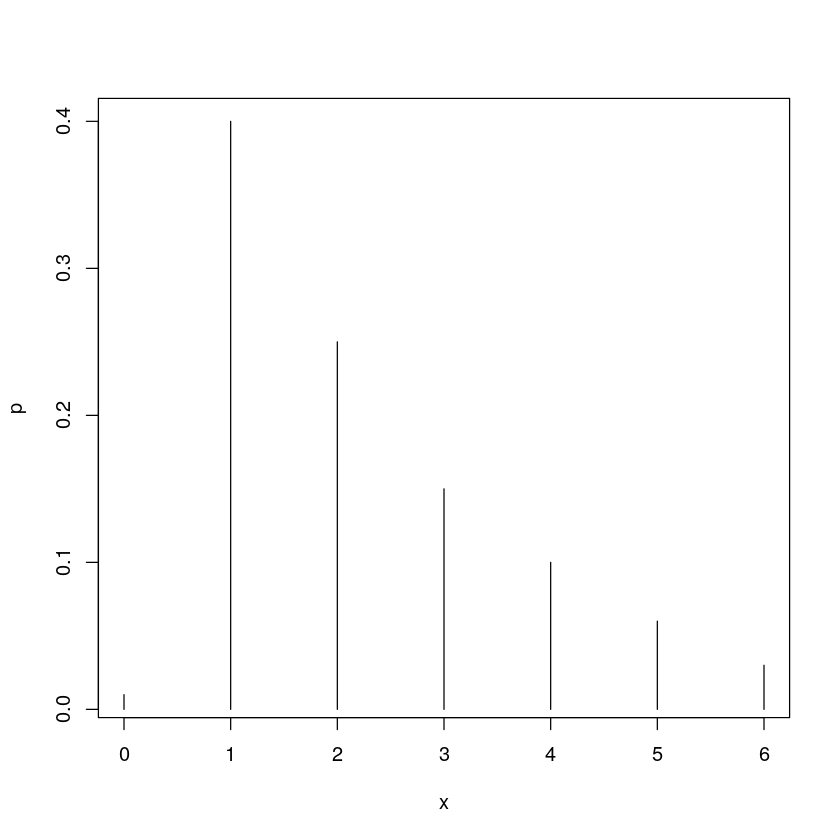

In [3]:
plot(x, p, type = "h")


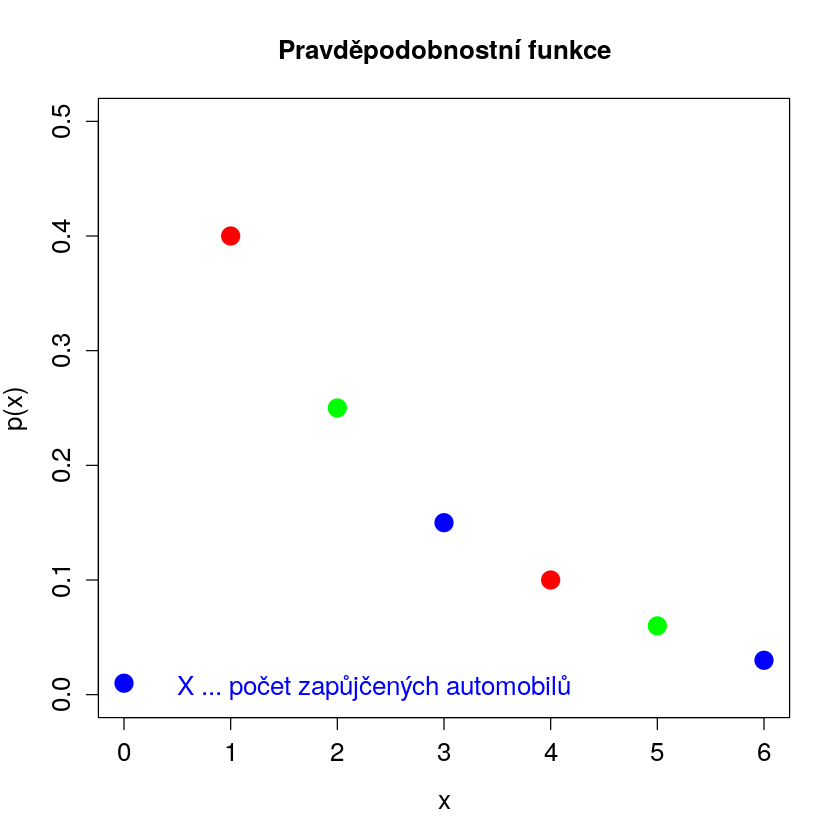

In [4]:
# Začínáme s grafikou -> graf dále upravujeme - používáme další parametry
plot(x, p,
     ylim = c(0, 0.5), # parametr pro rozsah osy y
     ylab = "p(x)", # parametr pro popis osy y
     main = "Pravděpodobnostní funkce", # parametr pro název grafu
     type = "p", # určuje o jaký typ grafu se jedná (p -> points, bodový)
     pch = 19, # parametr pro vzhled zobrazovaných bodů
     col = c("blue", "red", "green"), # barvy
     cex = 2, # parametr pro upravení velikosti celého grafu (ve smyslu zvětší 2x)
     cex.lab = 1.3, # parametr zvlášť pro velikost názvů os
     cex.axis = 1.3, # parametr zvlášť pro velikost hodnot na osách
     cex.main = 1.3
) # parametr pro velikost názvu grafu

text(0.5, 0.0, "X ... počet zapůjčených automobilů", cex = 1.3, col = "blue", adj = c(0, 0))


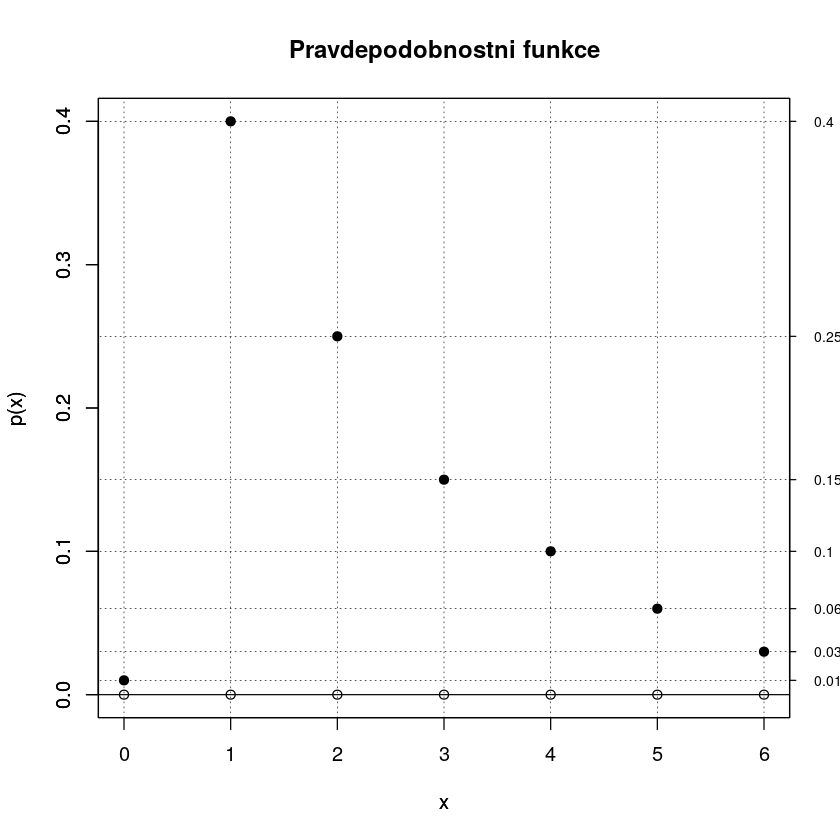

In [5]:
# Pravděpodobnostní funkce
pravd.f <- function(x, p) {
    plot(x, p, # plná kolečka - v skutečných hodnotách
        ylab = "p(x)", xaxt = "n", pch = 19, ylim = c(0, max(p)), main = "Pravdepodobnostni funkce"
    )
    lines(c(min(x) - 100, max(x) + 100), c(0, 0))
    for (i in seq_along(x)) {
        lines(c(min(x) - 100, max(x) + 100), c(p[i], p[i]),
            type = "l", lty = 3, lwd = 0.5
        ) # horizontální grid
        lines(c(x[i], x[i]), c(-0.1, 1.1),
            type = "l", lty = 3, lwd = 0.5
        ) # vertikální grid
    }
    par(new = TRUE) # že chceme kreslit do jednoho grafu
    plot(x, p * 0, # prázdná kolečka - tam kde je definovaná nenulová hodnota
        ylab = "p(x)", xaxt = "n", ylim = c(0, max(p))
    )
    axis(1, at = x, labels = x) # nastavení hodnot na X
    axis(4, at = p, labels = p, las = 2, cex.axis = 0.7, tck = -.01) # a Y
}

pravd.f(x, p)


 Poznámky k úvodu do grafiky 
 základem jsou tzv. high-level funkce, které vytvoří graf (tj. otevřou grafické okno a vykreslí dle zadaných parametrů)
 na ně navazují tzv. low-level funkce, které něco do aktviního grafického okna přidají, samy o sobě neotevřou nové
 výše použitá funkce "text" je low-level funkce - přidá text do stávajícího aktivního grafického okna
 další low-level funkce - např. abline, points, lines, legend, title, axis ... které přidají přímku, body, legendu...
 tzn. před použitím "low-level" funkce je potřeba, volat "high-level" funkci (např. plot, boxplot, hist, barplot, pie,...)

 další grafické parametry naleznete v nápovědě
 nebo např. zde http://www.statmethods.net/advgraphs/parameters.html
 nebo zde https://flowingdata.com/2015/03/17/r-cheat-sheet-for-graphical-parameters/
 nebo http://bcb.dfci.harvard.edu/~aedin/courses/BiocDec2011/2.Plotting.pdf

### 1. b)
Určete a zakreslete distribuční funkci náhodné veličiny X, která je definována jako počet
zapůjčených automobilů.

In [6]:
p

[1] 0.01 0.40 0.25 0.15 0.10 0.06 0.03

In [7]:
p
F_x <- cumsum(p)
F_x


[1] 0.01 0.40 0.25 0.15 0.10 0.06 0.03

[1] 0.01 0.41 0.66 0.81 0.91 0.97 1.00

In [8]:
F_x = c(0, 0.01, 0.41, 0.66, 0.81, 0.91, 0.97, 1)
F_x
diff(F_x)


[1] 0.00 0.01 0.41 0.66 0.81 0.91 0.97 1.00

[1] 0.01 0.40 0.25 0.15 0.10 0.06 0.03

In [9]:
plot(x, F_x, type = "s") # zjednodušený graf distribuční funkce


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


[1] 0.01 0.41 0.66 0.81 0.91 0.97 1.00

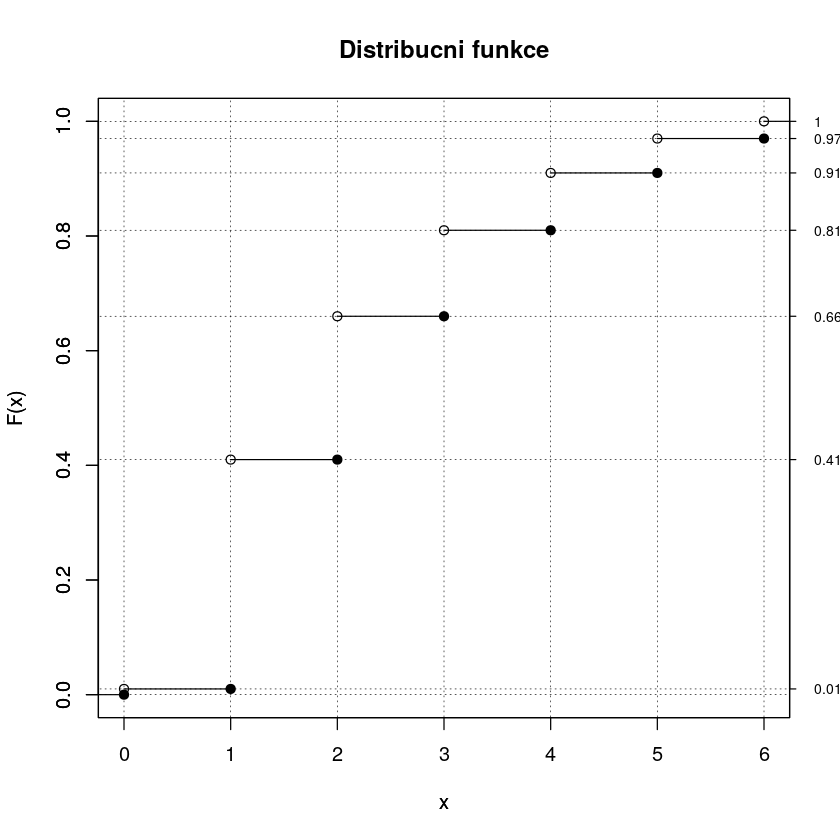

In [10]:
# Funkce pro výpočet a vykreslení distribuční funkce
dist.f <- function(x, p) {
    F_x <- cumsum(p)
    F_ext <- c(0, F_x) # natáhneme F o 0 na začátku
    x_ext <- c(x[1] - 1, x, x[length(x)] + 1) # a x z obou stran

    plot(x, F_x,
        ylab = "F(x)", xaxt = "n", ylim = c(0, 1), # prazdná kolečka
        type = "p", main = "Distribucni funkce"
    )
    par(new = TRUE) # že chceme kreslit do jednoho grafu
    plot(x, F_ext[1:(length(F_ext) - 1)], # plná kolečka
        ylab = "F(x)", xaxt = "n", ylim = c(0, 1), type = "p", pch = 19
    )

    for (i in 1:(length(x_ext) - 1)) {
        lines(c(min(x) - 100, max(x) + 100), c(F_ext[i], F_ext[i]),
            type = "l", lty = 3, lwd = 0.5
        ) # horizontální grid
        lines(c(x_ext[i], x_ext[i]), c(-0.1, 1.1),
            type = "l", lty = 3, lwd = 0.5
        ) # vertikální grid
        lines(x_ext[i:(i + 1)], c(F_ext[i], F_ext[i])) # graf - čáry
    }
    axis(1, at = x, labels = x) # nastavení hodnot na X
    axis(4, at = F_x, labels = F_x, las = 2, cex.axis = 0.7, tck = -.01) # a Y
    return(F_x)
}

dist.f(x, p)


### 1. c) 
Určete střední hodnotu, rozptyl, směrodatnou odchylku a modus počtu zapůjčených automobilů během jednoho dne.

In [11]:
# Střední hodnota
x * p
EX <- sum(x * p)
EX


[1] 0.00 0.40 0.50 0.45 0.40 0.30 0.18

[1] 2.23

In [12]:
sum((x-EX)^2*p)

[1] 1.9571

In [13]:
# Rozptyl
EX2 <- sum(x * x * p) # druhý obecný moment
DX <- EX2 - EX^2
DX


[1] 1.9571

In [14]:
# Směrodatná odchylka
sigma.X <- sqrt(DX)
sigma.X


[1] 1.398964

In [15]:
# Funkce pro výpočet základních číselných charakteristik
souhrn <- function(x, p) {
  EX <- sum(x * p)
  EX2 <- sum(x * x * p)
  DX <- EX2 - EX^2
  sigma.X <- sqrt(DX)
  # zápis výsledků do tabulky
  tab <- rbind(EX, DX, sigma.X)
  tab.popis <- c("str. hodnota", "rozptyl", "smer. odchylka")
  rownames(tab) <- tab.popis
  return(tab)
}


In [16]:
souhrn(x, p)


str. hodnota,2.230000
rozptyl,1.957100
smer. odchylka,1.398964


### 1. d)
Určete pravděpodobnostní funkci a distribuční funkci náhodné veličiny Y, která je definována jako denní příjem majitele servisu.

In [17]:
y <- 500 * x
y


[1]    0  500 1000 1500 2000 2500 3000

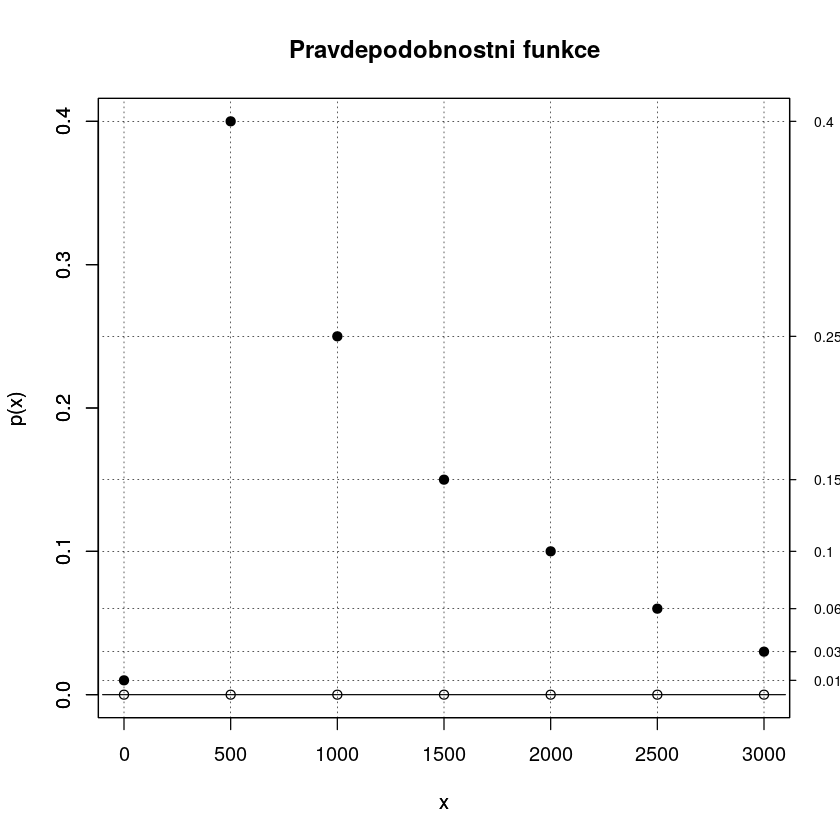

In [18]:
pravd.f(y, p)


[1] 0.01 0.41 0.66 0.81 0.91 0.97 1.00

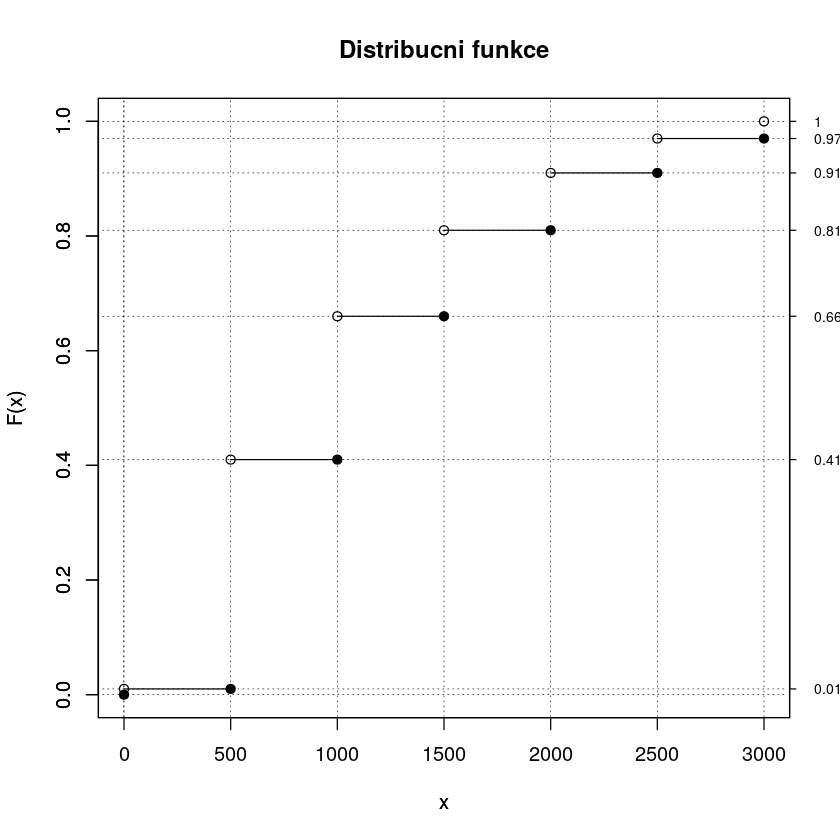

In [19]:
# Distribuční funkce
dist.f(y, p)


### 1. e) 
Určete střední hodnotu, směrodatnou odchylku a modus příjmu majitele servisu ze zapůjčených automobilů během jednoho dne.

In [20]:
souhrn(y, p)


str. hodnota,1115.000
rozptyl,489275.000
smer. odchylka,699.482


### 1. f) 
Určete pravděpodobnost, že příjem majitele servisu (náhodná veličina Y) z půjčování automobilů převýší jeho výdaje.

In [ ]:
# zisk
z <- 500 * x - 800
z


In [ ]:
# příjem převýší výdaje, když je zisk kladný
z > 0


In [ ]:
p
sum(p[z > 0])


### 1. g) 
Určete střední hodnotu, směrodatnou odchylku a modus náhodné veličiny Z, která je definována jako zisk majitele servisu ze zapůjčených automobilů během jednoho dne.

In [ ]:
souhrn(z, p)


## Příklad č. 2
Pro distribuční funkci náhodné veličiny X platí:

$F(x)=\begin{cases}
0   &      x \leq -1 \\
0.3 & -1 < x \leq  0 \\
0.7 &  0 < x \leq  1 \\
1   &  1 < x
\end{cases}$

### 2. a) 
Určete pravděpodobnostní funkci náhodné veličiny X, její střední hodnotu a směrodatnou odchylku.

In [ ]:
F_x <- c(0, 0.3, 0.7, 1)
F_x
x <- c(-1, 0, 1)
x


In [ ]:
diff(F_x)


In [ ]:
p <- diff(F_x)
x
p


In [ ]:
pravd.f(x, p)


In [ ]:
dist.f(x, p)


In [ ]:
souhrn(x, p)


### 2. b) 
Náhodná veličina Y = 1 − 3X, určete P(y), F(y), E(Y), D(Y).

In [ ]:
y <- 1 - 3 * x
pravd.f(y, p)


In [ ]:
dist.f(y, p) # Nesmyslný výstup - čím je to způsobeno?
y
p


In [ ]:
y
sort(y)
idx_sorted <- order(y) # funkce order vrátí indexy setřízeného pořadí
idx_sorted
y <- y[idx_sorted]
p_y <- p[idx_sorted]
p_y


In [ ]:
dist.f(y, p_y)


In [ ]:
souhrn(y, p_y)


### 2. c) 
Náhodná veličina W = $3X^2$, určete P(w), F(w), E(W), D(W).

In [ ]:
w <- 3 * x * x
w


In [ ]:
pravd.f(w, p)
dist.f(w, p)


In [ ]:
w
w_uniq <- unique(w)
w_uniq
w_sorted <- sort(w_uniq)
w_sorted


In [ ]:
p_w <- w_sorted * 0 # inicializace pole o stejné velikosti
for (i in seq_along(w_sorted)) {
    p_w[i] <- sum(p[w == w_sorted[i]])
}
p_w


In [ ]:
pravd.f(w_sorted, p_w)
dist.f(w_sorted, p_w)
souhrn(w_sorted, p_w)


## Příklad 3.
V dílně jsou dva stroje pracující nezávisle na sobě. Pravděpodobnost poruchy prvního stroje
je 0,2, pravděpodobnost poruchy druhého stroje je 0,3. Náhodná veličina X je definována jako
počet současně porouchaných strojů. Určete:
### 3. a) 
pravděpodobnostní funkci náhodné veličiny X,

In [ ]:
x <- c(0, 1, 2)
x
p1 <- 0.2
p2 <- 0.3


In [ ]:
p <- x * 0
# spočteme jednotlivé pravděpodobnosti počtu porouchaných strojů
p[1] <- (1 - p1) * (1 - p2) # 0 porouchaných tedy oba v provozu
p[3] <- p1 * p2 # 2 tedy porouchané oba
p
1 - sum(p)
p[2] <- (1 - p1) * p2 + p1 * (1 - p2) # právě jeden - buď první nebo druhý
p


In [ ]:
sum(p)


In [ ]:
pravd.f(x, p)


### 3. b)
distribuční funkci náhodné veličiny X,

In [ ]:
dist.f(x, p)


### 3. c)
střední hodnotu a rozptyl náhodné veličiny X.

In [ ]:
souhrn(x, p)
